In [1]:
# imports
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# downloading stopwords and stemming
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
#reading data
df = pd.read_csv('train.csv', header=None, names=["rating", "subject", "review"])
print(df.columns)
print(df.info())
print(df.head())

Index(['rating', 'subject', 'review'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   rating   100001 non-null  int64 
 1   subject  99996 non-null   object
 2   review   100001 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
None
   rating                                            subject  \
0       2                     Stuning even for the non-gamer   
1       2              The best soundtrack ever to anything.   
2       2                                           Amazing!   
3       2                               Excellent Soundtrack   
4       2  Remember, Pull Your Jaw Off The Floor After He...   

                                              review  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music 

In [3]:
# checking for null values
print(df.isnull().sum())

rating     0
subject    5
review     0
dtype: int64


In [4]:
# mapping ratings as 0 and 1 from 1 and 2
df["rating"] = df["rating"].map({1: 0, 2: 1})
print(df.head())

   rating                                            subject  \
0       1                     Stuning even for the non-gamer   
1       1              The best soundtrack ever to anything.   
2       1                                           Amazing!   
3       1                               Excellent Soundtrack   
4       1  Remember, Pull Your Jaw Off The Floor After He...   

                                              review  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  


Negative:  48733
Positive:  51268


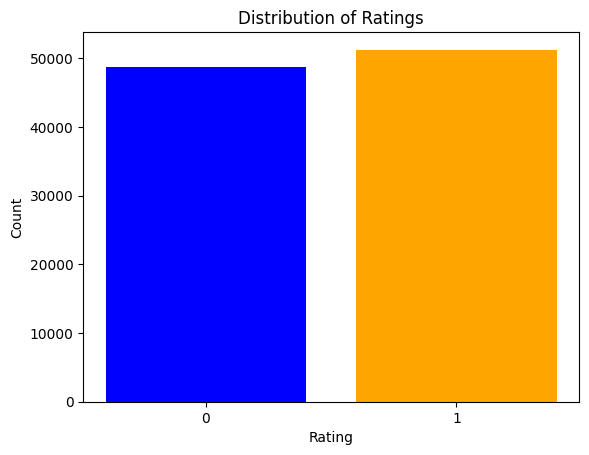

In [5]:
# distribution of positive and negative ratings in the dataset
rating_counts = df["rating"].value_counts().sort_index()

for rating, count in rating_counts.items():
  if rating:
    print("Positive: ", count)
  else:
    print("Negative: ", count)


# plotting values
plt.bar(rating_counts.index, rating_counts.values, color=["blue", "orange"])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.xticks([0, 1])
plt.show()

In [6]:
# setting stopwords and stemmer
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# pre processing text
def preprocess_text(text):
    if not isinstance(text, str):
          text = str(text)
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # remove numbers
    text = re.sub(r"\d+", "", text)
    # tokenize the text
    words = word_tokenize(text)
    # apply stopwords and stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# concatenating subject and review in a new column
df["clean_text"] = df["subject"] + " " + df["review"]
df["clean_text"] = df["clean_text"].apply(preprocess_text)
print(df.head())


   rating                                            subject  \
0       1                     Stuning even for the non-gamer   
1       1              The best soundtrack ever to anything.   
2       1                                           Amazing!   
3       1                               Excellent Soundtrack   
4       1  Remember, Pull Your Jaw Off The Floor After He...   

                                              review  \
0  This sound track was beautiful! It paints the ...   
1  I'm reading a lot of reviews saying that this ...   
2  This soundtrack is my favorite music of all ti...   
3  I truly like this soundtrack and I enjoy video...   
4  If you've played the game, you know how divine...   

                                          clean_text  
0  stune even nongam sound track beauti paint sen...  
1  best soundtrack ever anyth im read lot review ...  
2  amaz soundtrack favorit music time hand intens...  
3  excel soundtrack truli like soundtrack enjoy v...  
4  

In [7]:
# using vectorizer to extract top 5k words
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"]).toarray()
y = df["rating"].values

# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.8744562771861407
Naive Bayes Accuracy: 0.8388080595970201
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      9683
           1       0.88      0.88      0.88     10318

    accuracy                           0.87     20001
   macro avg       0.87      0.87      0.87     20001
weighted avg       0.87      0.87      0.87     20001

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      9683
           1       0.84      0.85      0.84     10318

    accuracy                           0.84     20001
   macro avg       0.84      0.84      0.84     20001
weighted avg       0.84      0.84      0.84     20001



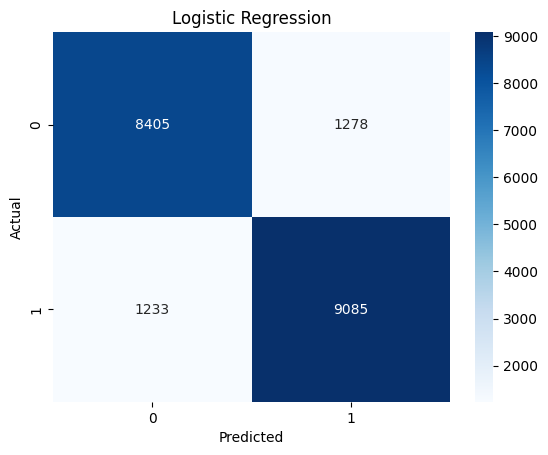

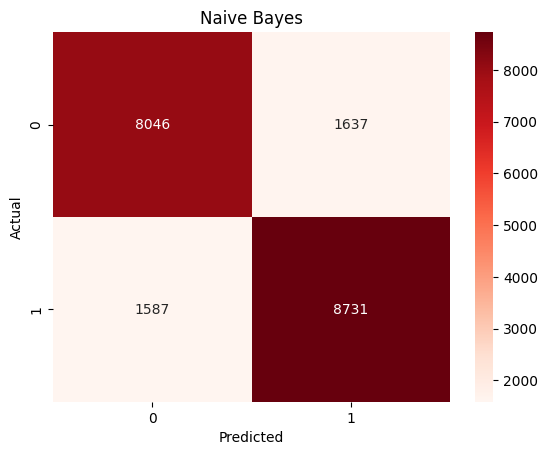

In [8]:
# training logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# training naive bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# prediction using logistic regression
y_pred_lr = log_reg.predict(X_test)

# prediction using naive bayes
y_pred_nb = nb.predict(X_test)

# accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)

acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", acc_nb)

# classification report
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb))

# confustion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Reds")
plt.title("Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
# custom example
def predict_sentiment(review, model):
    review = preprocess_text(review)
    review_vector = vectorizer.transform([review])
    prediction = model.predict(review_vector)[0]
    return "Positive" if prediction == 1 else "Negative"

new_review = "this product is good"
print("Logistic Regression Prediction:", predict_sentiment(new_review, log_reg))
print("Naive Bayes Prediction:", predict_sentiment(new_review, nb))



Logistic Regression Prediction: Positive
Naive Bayes Prediction: Positive


In [10]:
# performing lda on dataset
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# performing logistic regression on lda dataset
log_reg_lda = LogisticRegression()
log_reg_lda.fit(X_train_lda, y_train)

# performing naive bayes on lda dataset
nb_lda = GaussianNB()
nb_lda.fit(X_train_lda, y_train)

# predicting for both
y_pred_lr_lda = log_reg_lda.predict(X_test_lda)
y_pred_nb_lda = nb_lda.predict(X_test_lda)




Logistic Regression (LDA) Accuracy: 0.8654567271636419
Naive Bayes (LDA) Accuracy: 0.8653067346632668


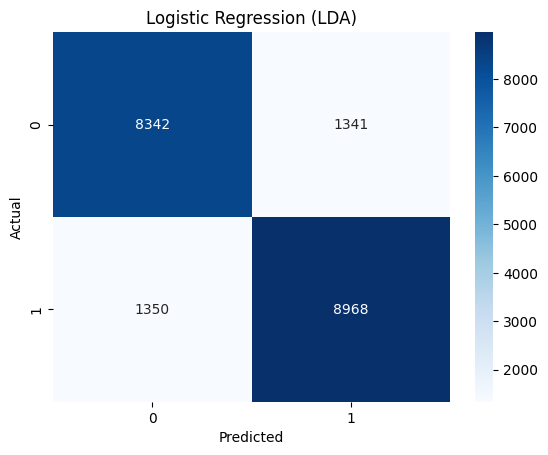

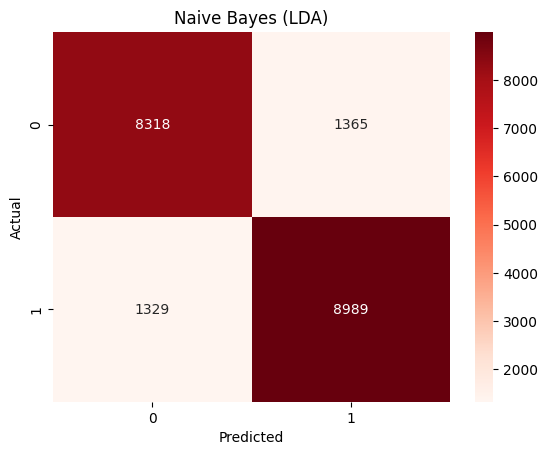

In [11]:
# calculating accuracy
print("Logistic Regression (LDA) Accuracy:", accuracy_score(y_test, y_pred_lr_lda))
print("Naive Bayes (LDA) Accuracy:", accuracy_score(y_test, y_pred_nb_lda))

# confustion matrix
cm_lr_lda = confusion_matrix(y_test, y_pred_lr_lda)
sns.heatmap(cm_lr_lda, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression (LDA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_nb_lda = confusion_matrix(y_test, y_pred_nb_lda)
sns.heatmap(cm_nb_lda, annot=True, fmt="d", cmap="Reds")
plt.title("Naive Bayes (LDA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# logistic regression grid search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_lda, y_train)

print("Best Params (Logistic Regression):", grid_lr.best_params_)
print("Best Score (Logistic Regression):", grid_lr.best_score_)

Best Params (Logistic Regression): {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score (Logistic Regression): 0.8965250000000001


In [13]:

# naive bayes grid search
param_grid_nb = {
    'var_smoothing': np.logspace(-9, -6, 4)
}

grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train_lda, y_train)

print("Best Params (Naive Bayes):", grid_nb.best_params_)
print("Best Score (Naive Bayes):", grid_nb.best_score_)


Best Params (Naive Bayes): {'var_smoothing': np.float64(1e-09)}
Best Score (Naive Bayes): 0.8963875


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      9683
           1       0.85      0.85      0.85     10318

    accuracy                           0.85     20001
   macro avg       0.85      0.85      0.85     20001
weighted avg       0.85      0.85      0.85     20001



In [15]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))


c:\Users\Admin\Downloads\ML Project\ML\lib\site-packages\xgboost\training.py:183: UserWarning: [21:09:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      9683
           1       0.85      0.86      0.85     10318

    accuracy                           0.85     20001
   macro avg       0.85      0.85      0.85     20001
weighted avg       0.85      0.85      0.85     20001



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


base_models = [
    ('svc', LinearSVC()),
    ('knn', KNeighborsClassifier()),
    ('dtree', DecisionTreeClassifier())
]


stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    passthrough=False,  
    cv=5  
)


stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report
print("Stacking Classifier (LinearSVC + KNN + DecisionTree):\n", classification_report(y_test, y_pred_stack))


Stacking Classifier (LinearSVC + KNN + DecisionTree):
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      9683
           1       0.87      0.89      0.88     10318

    accuracy                           0.88     20001
   macro avg       0.88      0.88      0.88     20001
weighted avg       0.88      0.88      0.88     20001



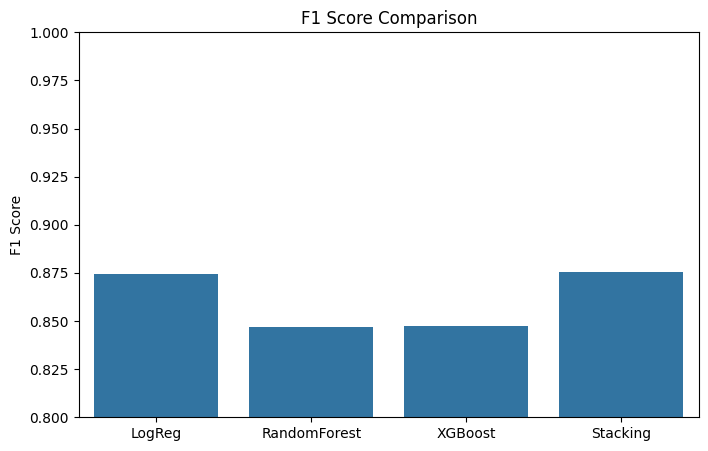

In [17]:
model_names = ['LogReg', 'RandomForest', 'XGBoost', 'Stacking']
f1_scores = [
    classification_report(y_test, y_pred_lr, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_xgb, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_stack, output_dict=True)['weighted avg']['f1-score']
]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=f1_scores)
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0.8, 1.0)
plt.show()
